In [1]:
import pandas as pd
import matplotlib.pyplot  as plt


In [2]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

In [3]:
# Drop the 'City' column
data = data.drop(columns=['City'])

# Group by 'Country' and calculate the mean for all numeric columns
country_aggregated = data.groupby('Country').mean().reset_index()

# Round all numeric columns to 0 decimal places
country_aggregated = country_aggregated.round(0)

# Display the result
country_aggregated.head()


,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
0,AO,1.0,1.0,0.0,1.0,0.0,274.0,0.0,22.0
1,AR,2.0,3.0,2.0,36.0,0.0,321.0,2.0,11.0
2,AU,4.0,11.0,1.0,48.0,1.0,247.0,0.0,3.0
3,BD,66.0,72.0,10.0,39.0,1.0,668.0,4.0,23.0
4,BO,4.0,9.0,2.0,40.0,0.0,517.0,1.0,19.0


In [4]:
df_ranked = country_aggregated.sort_values(by='MortalityRate_per_100k', ascending=False)
df_ranked

,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
85,UZ,4.0,11.0,1.0,33.0,0.0,205.0,4.0,46.0
51,MN,2.0,10.0,1.0,75.0,1.0,210.0,0.0,44.0
62,OM,8.0,22.0,2.0,39.0,0.0,204.0,0.0,39.0
66,PK,16.0,44.0,3.0,38.0,0.0,362.0,0.0,39.0
13,CM,0.0,1.0,0.0,2.0,0.0,262.0,0.0,38.0
...,...,...,...,...,...,...,...,...,...
27,FR,2.0,5.0,1.0,60.0,1.0,206.0,1.0,4.0
61,NZ,3.0,4.0,2.0,60.0,3.0,225.0,2.0,4.0
39,IS,1.0,1.0,0.0,61.0,0.0,216.0,0.0,4.0
7,CA,2.0,2.0,2.0,62.0,1.0,219.0,1.0,3.0


In [5]:
x_axis = df_ranked['Country']
y_axis = df_ranked['MortalityRate_per_100k']

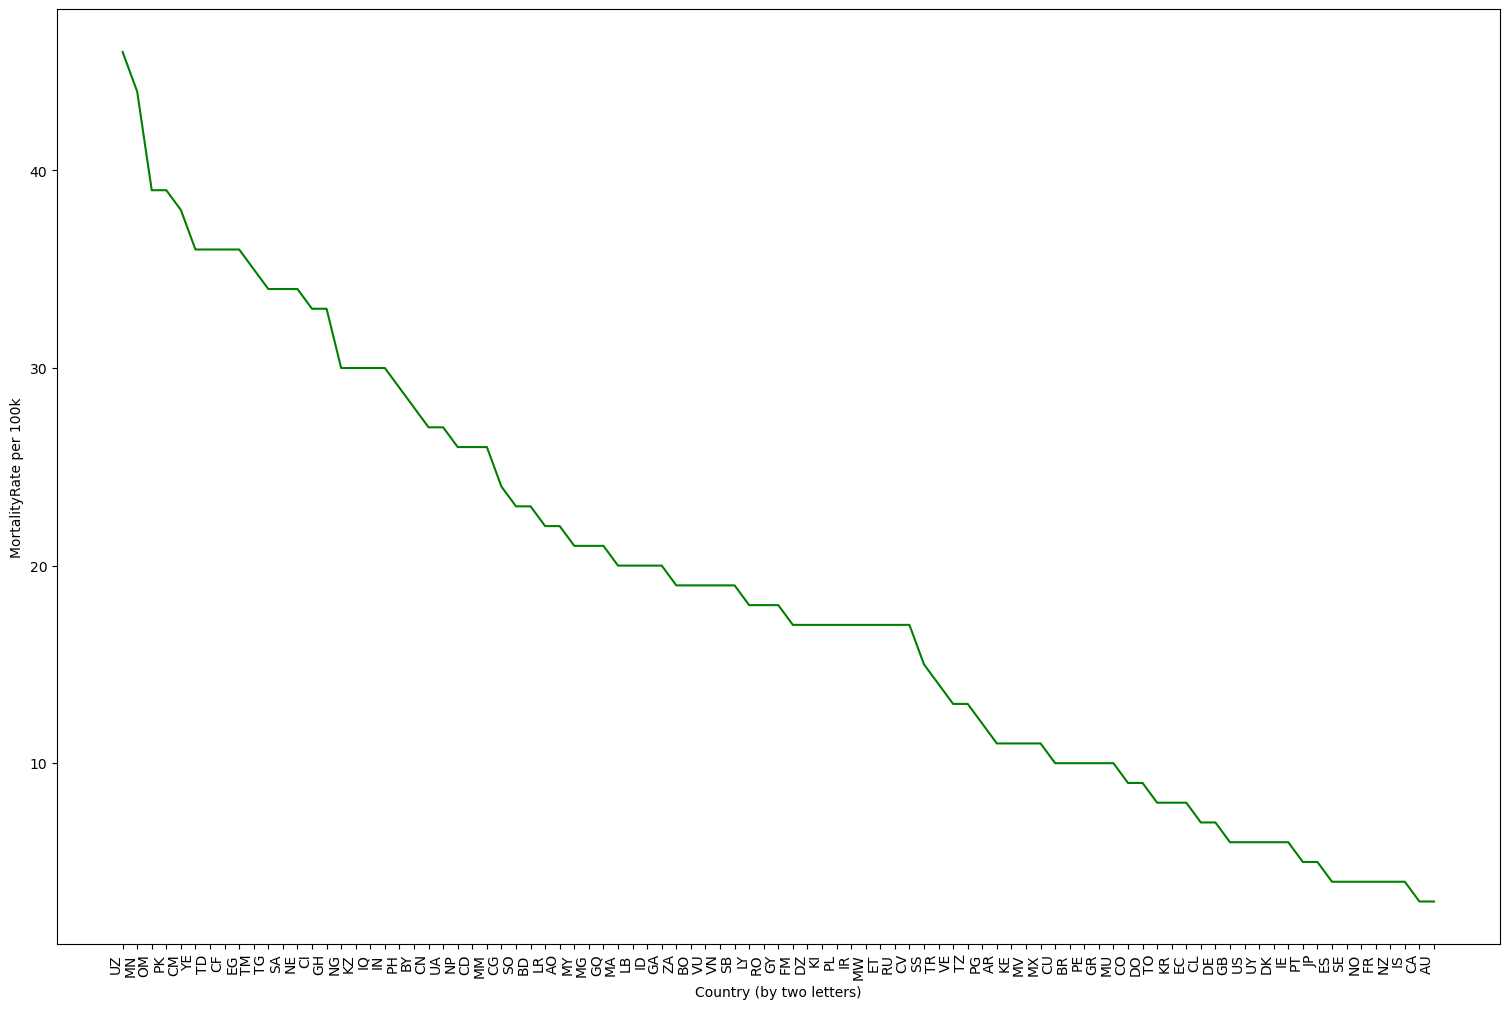

In [6]:
plt.figure(figsize=(15, 10)) 
plt.plot(x_axis,y_axis, color='green')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.xlabel("Country (by two letters)")
plt.ylabel("MortalityRate per 100k")
plt.show() 


In [7]:
country_x_aixs = df_ranked['Country']
PM10_y_axis = df_ranked['PM10']

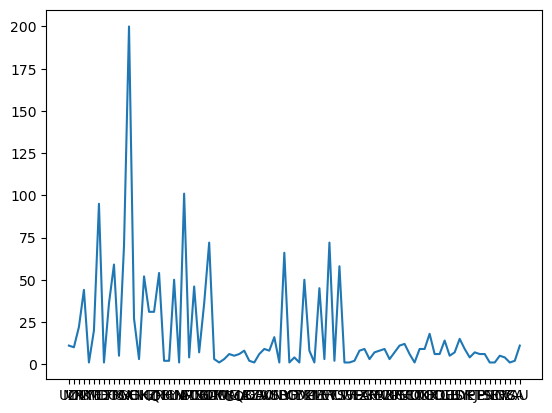

In [8]:
plt.plot(country_x_aixs, PM10_y_axis)
plt.show()


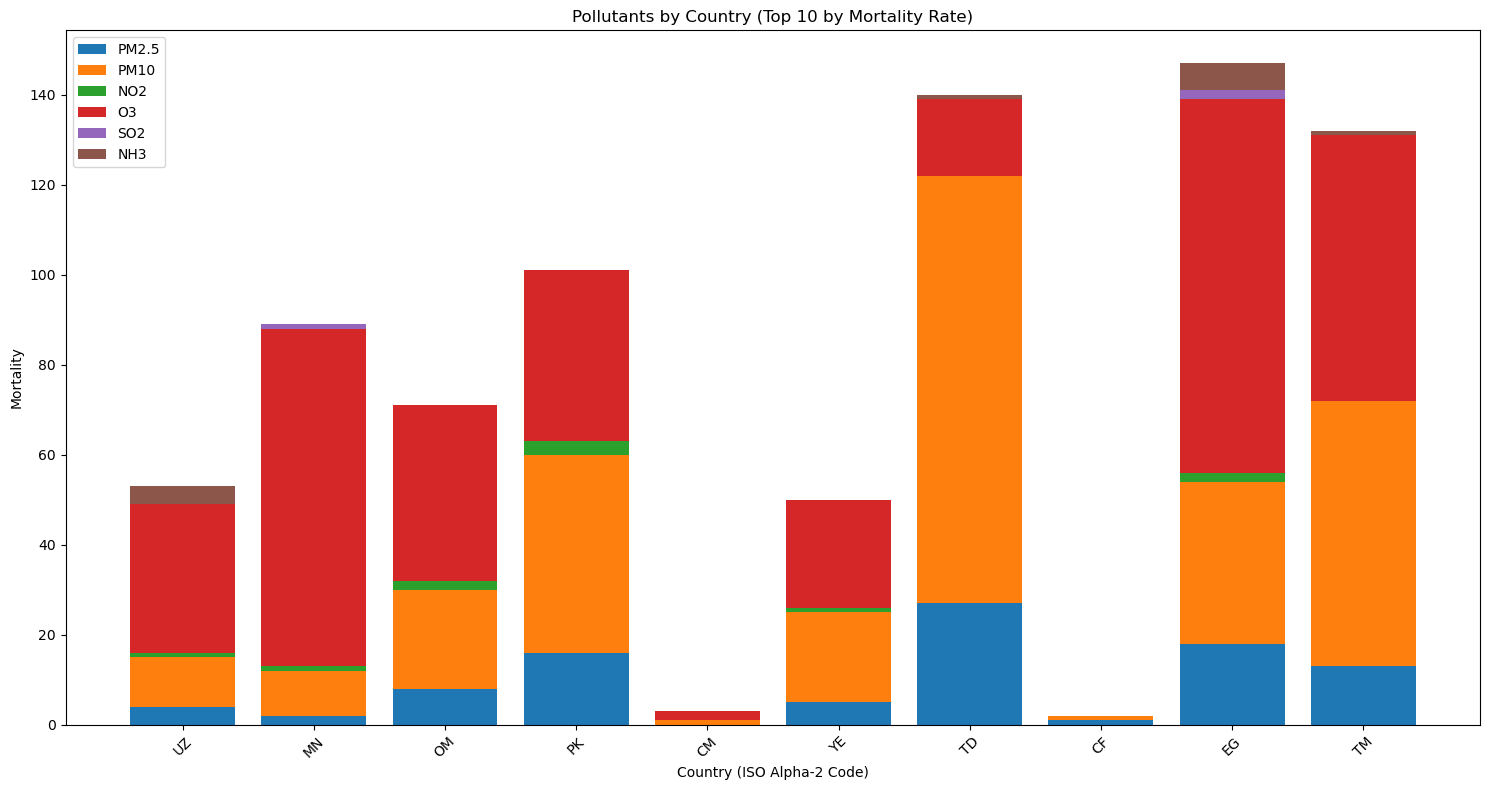

In [9]:
top_10 = df_ranked.head(10)
plt.figure(figsize=(15, 8))
plt.bar(top_10['Country'], top_10['PM2.5'], label='PM2.5')
plt.bar(top_10['Country'], top_10['PM10'], bottom=top_10['PM2.5'], label='PM10')
plt.bar(top_10['Country'], top_10['NO2'], bottom=top_10['PM2.5'] + top_10['PM10'], label='NO2')
plt.bar(top_10['Country'], top_10['O3'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'], label='O3')
plt.bar(top_10['Country'], top_10['SO2'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'] + top_10['O3'], label='SO2')
plt.bar(top_10['Country'], top_10['NH3'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'] + top_10['O3'] + top_10['SO2'], label='NH3')

plt.xlabel('Country (ISO Alpha-2 Code)')
plt.ylabel('Mortality')
plt.title('Pollutants by Country (Top 10 by Mortality Rate)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
bot_10 = df_ranked.sort_values(by='MortalityRate_per_100k', ascending=True).head(10)
bot_10

,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
2,AU,4.0,11.0,1.0,48.0,1.0,247.0,0.0,3.0
7,CA,2.0,2.0,2.0,62.0,1.0,219.0,1.0,3.0
61,NZ,3.0,4.0,2.0,60.0,3.0,225.0,2.0,4.0
24,ES,1.0,6.0,1.0,69.0,0.0,197.0,0.0,4.0
73,SE,1.0,1.0,0.0,29.0,0.0,210.0,0.0,4.0
39,IS,1.0,1.0,0.0,61.0,0.0,216.0,0.0,4.0
27,FR,2.0,5.0,1.0,60.0,1.0,206.0,1.0,4.0
59,NO,1.0,1.0,2.0,51.0,1.0,221.0,0.0,4.0
40,JP,3.0,6.0,3.0,80.0,2.0,213.0,1.0,5.0
68,PT,2.0,7.0,1.0,85.0,0.0,201.0,0.0,5.0


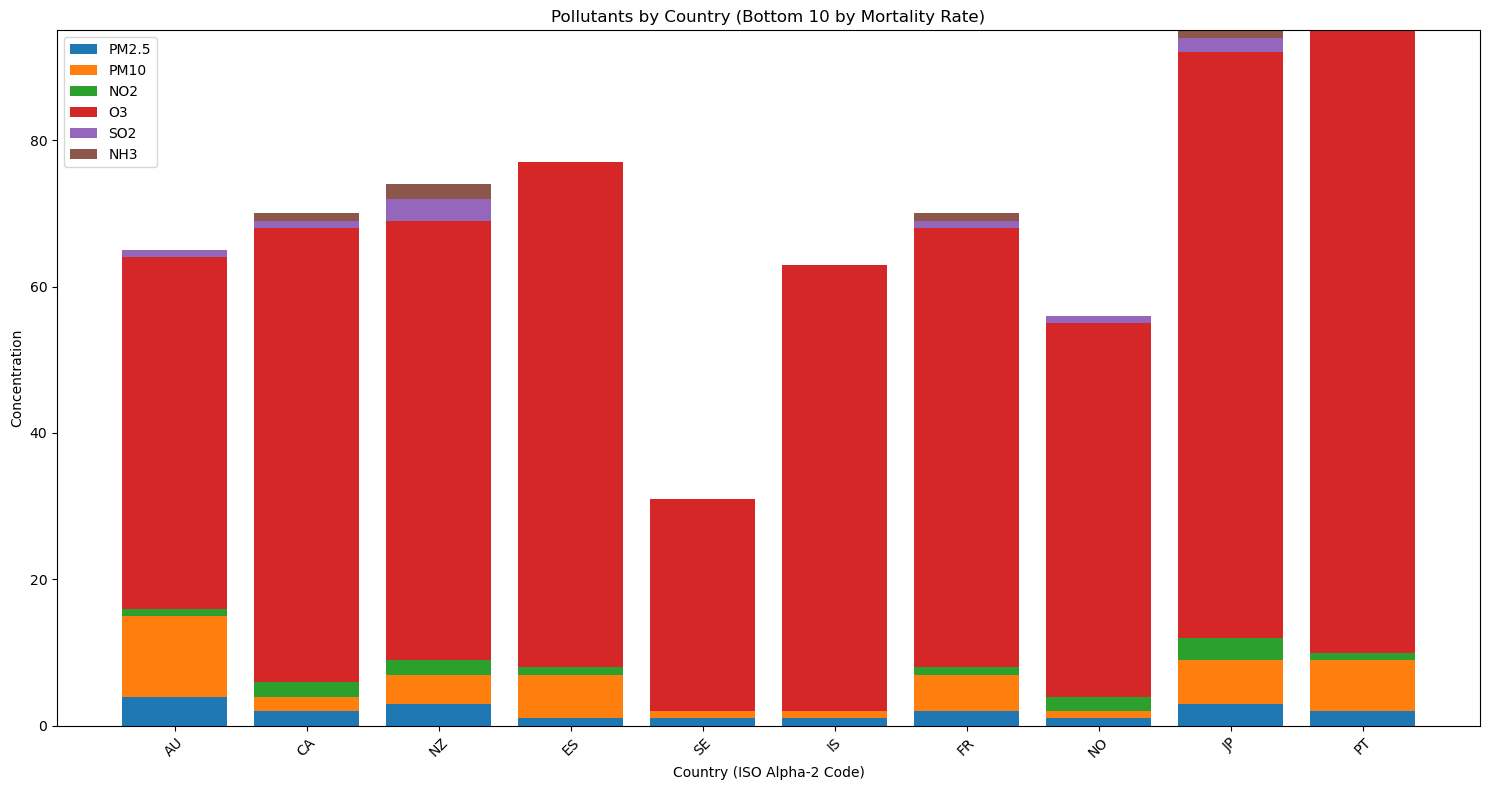

In [11]:
plt.figure(figsize=(15, 8))
plt.bar(bot_10['Country'], bot_10['PM2.5'], label='PM2.5')
plt.bar(bot_10['Country'], bot_10['PM10'], bottom=bot_10['PM2.5'], label='PM10')
plt.bar(bot_10['Country'], bot_10['NO2'], bottom=bot_10['PM2.5'] + bot_10['PM10'], label='NO2')
plt.bar(bot_10['Country'], bot_10['O3'], bottom=bot_10['PM2.5'] + bot_10['PM10'] + bot_10['NO2'], label='O3')
plt.bar(bot_10['Country'], bot_10['SO2'], bottom=bot_10['PM2.5'] + bot_10['PM10'] + bot_10['NO2'] + bot_10['O3'], label='SO2')
plt.bar(bot_10['Country'], bot_10['NH3'], bottom=bot_10['PM2.5'] + bot_10['PM10'] + bot_10['NO2'] + bot_10['O3'] + bot_10['SO2'], label='NH3')

plt.xlabel('Country (ISO Alpha-2 Code)')
plt.ylabel('Concentration')
plt.title('Pollutants by Country (Bottom 10 by Mortality Rate)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
combined_df = pd.concat([top_10, bot_10])


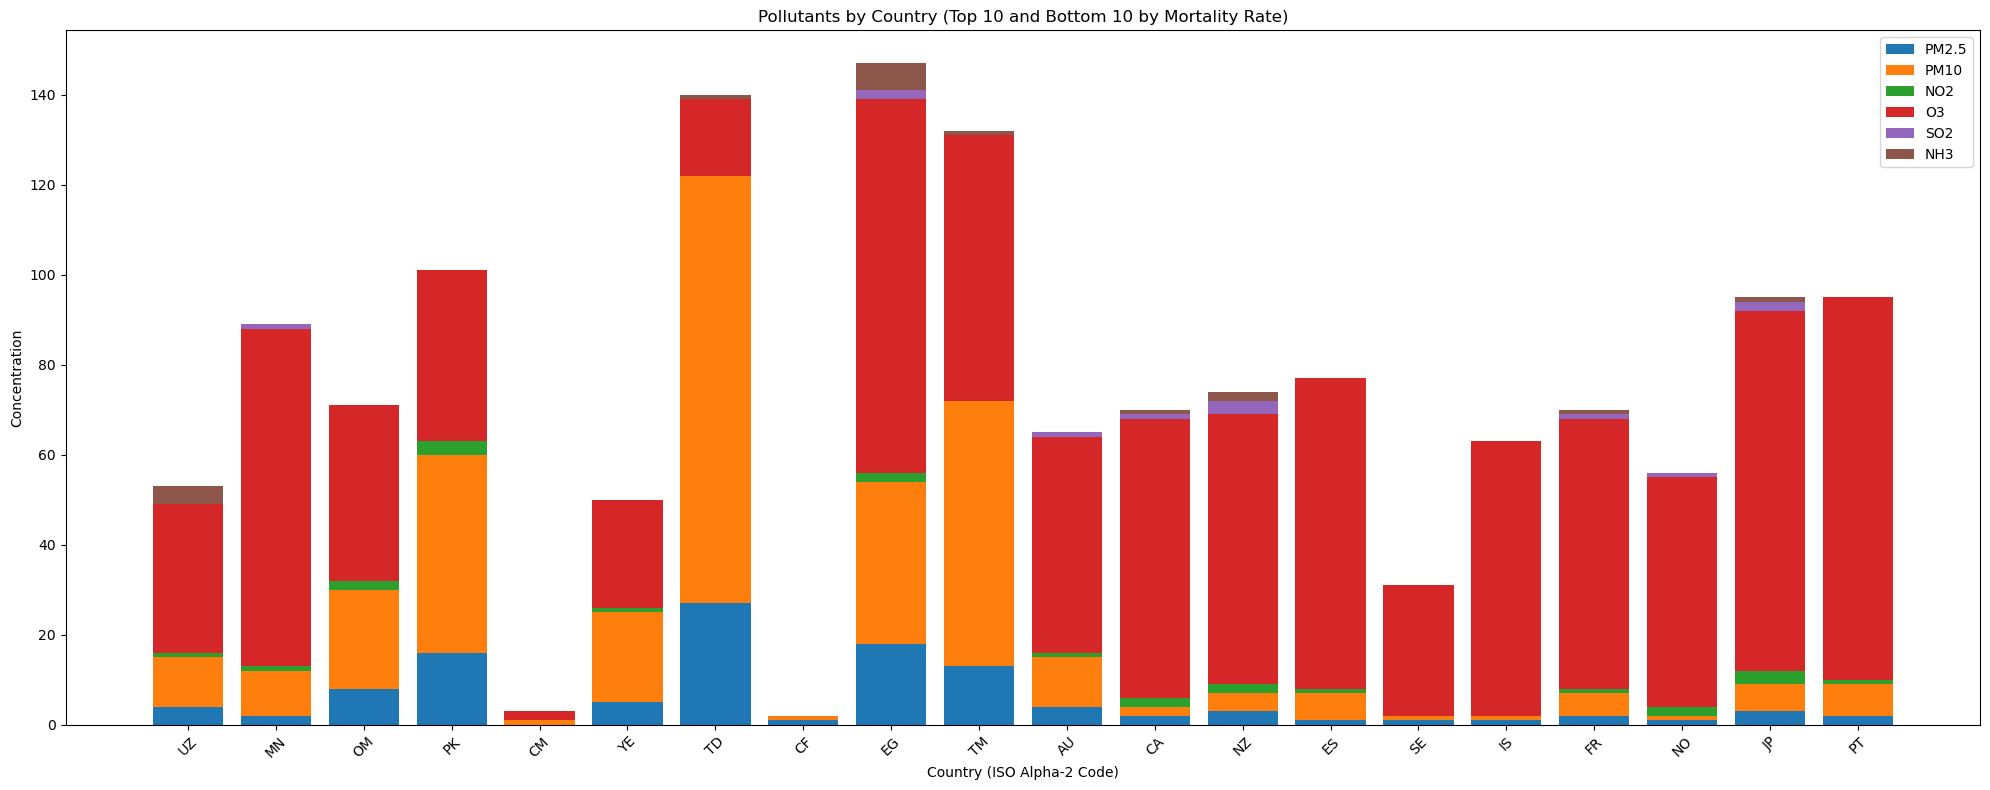

In [13]:
plt.figure(figsize=(20, 8))  # Increase the width for better readability

# Create a stacked bar chart excluding CO
plt.bar(combined_df['Country'], combined_df['PM2.5'], label='PM2.5')
plt.bar(combined_df['Country'], combined_df['PM10'], bottom=combined_df['PM2.5'], label='PM10')
plt.bar(combined_df['Country'], combined_df['NO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'], label='NO2')
plt.bar(combined_df['Country'], combined_df['O3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'], label='O3')
plt.bar(combined_df['Country'], combined_df['SO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'], label='SO2')
plt.bar(combined_df['Country'], combined_df['NH3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'] + combined_df['SO2'], label='NH3')

# Add labels and title
plt.xlabel('Country (ISO Alpha-2 Code)')
plt.ylabel('Concentration')
plt.title('Pollutants by Country (Top 10 and Bottom 10 by Mortality Rate)')
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [14]:
df_CO_ranked = country_aggregated.sort_values(by='CO', ascending=False)
df_CO_ranked

,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
60,NP,80.0,101.0,5.0,40.0,2.0,701.0,4.0,26.0
3,BD,66.0,72.0,10.0,39.0,1.0,668.0,4.0,23.0
87,VN,13.0,16.0,8.0,20.0,2.0,651.0,6.0,19.0
11,CI,16.0,27.0,5.0,5.0,1.0,626.0,3.0,33.0
50,MM,41.0,46.0,4.0,37.0,1.0,621.0,6.0,26.0
...,...,...,...,...,...,...,...,...,...
37,IQ,7.0,31.0,0.0,75.0,0.0,194.0,1.0,30.0
26,FM,0.0,1.0,0.0,21.0,0.0,193.0,0.0,17.0
42,KI,2.0,8.0,0.0,25.0,0.0,192.0,0.0,17.0
21,DZ,13.0,50.0,1.0,62.0,0.0,191.0,0.0,17.0


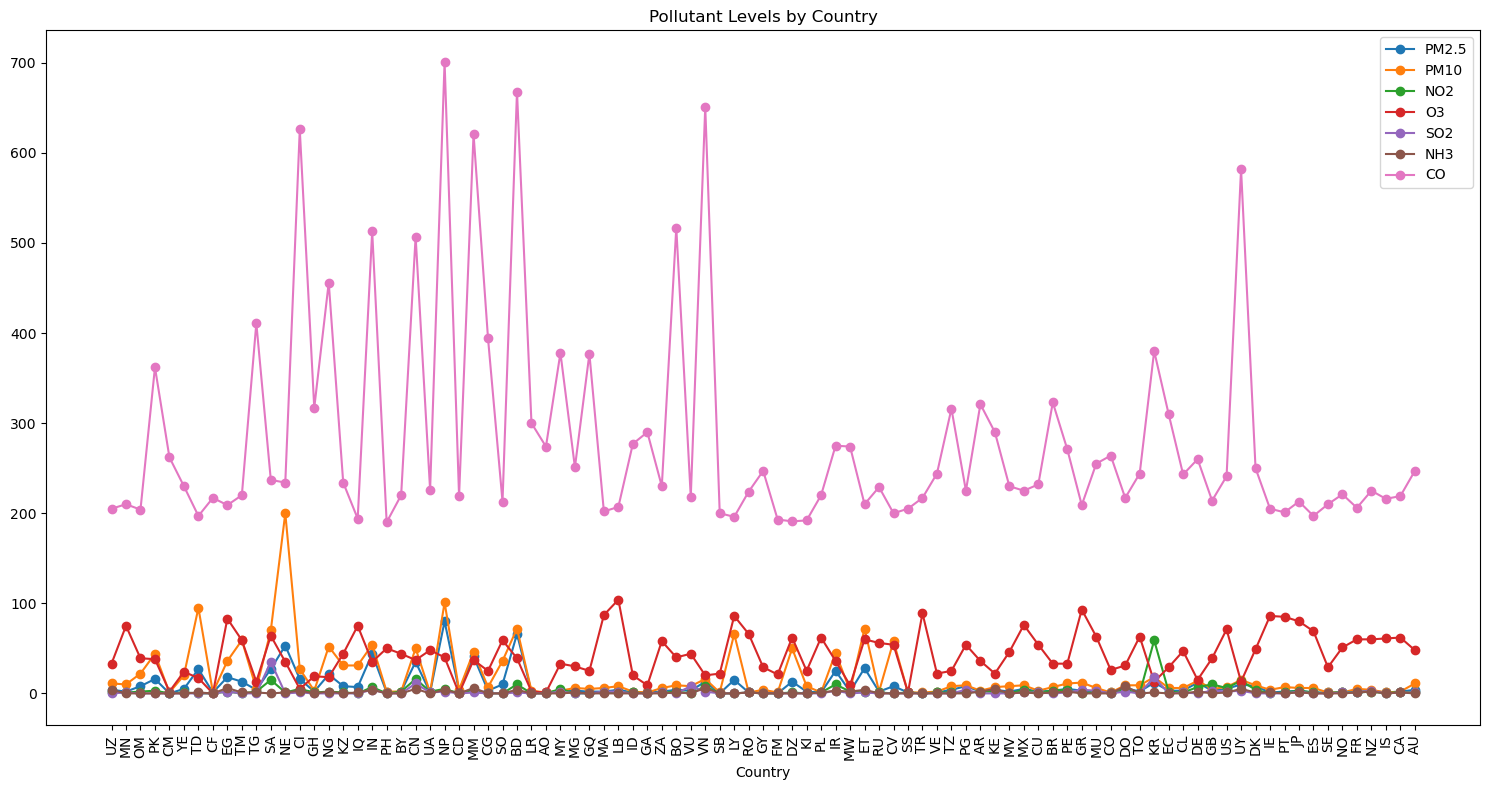

In [15]:
# Plot settings
plt.figure(figsize=(15, 8))  # Adjust figure size as needed

# Plot each pollutant as a line
plt.plot(df_ranked['Country'], df_ranked['PM2.5'], label='PM2.5', marker='o')
plt.plot(df_ranked['Country'], df_ranked['PM10'], label='PM10', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NO2'], label='NO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['O3'], label='O3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['SO2'], label='SO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NH3'], label='NH3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['CO'], label='CO', marker='o')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('')
plt.title('Pollutant Levels by Country')
plt.xticks(rotation=90)

# Display the legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
